In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import plotly.express as px
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [53]:
gaiu_emissions = pd.read_csv('../data/gaiu_emissions_to_be_imported.csv')
gaiu_emissions_1990_2014 = pd.read_csv('../data/gaiu_emissions_1990_2014_to_be_imported.csv')
gaiu_emissions.describe(exclude = ['object','int64'])

,GDP Per Capita,% Internet Use,CO2 (kts) Emitted
count,950.000000,950.000000,9.500000e+02
mean,34836.020169,36.589170,3.728137e+05
std,16661.875857,31.931312,9.398384e+05
min,5805.266913,0.000000,2.128410e+03
25%,23723.575439,2.999360,3.782935e+04
50%,34231.180965,32.975000,6.554466e+04
75%,44028.596489,66.710700,3.365603e+05
max,115256.016699,98.160000,6.131893e+06


In [54]:
gaiu_emissions[gaiu_emissions['Year'].isin([2014])].describe(exclude = ['object','int64'])

,GDP Per Capita,% Internet Use,CO2 (kts) Emitted
count,40.000000,40.00000,4.000000e+01
mean,40105.165298,77.73325,3.428490e+05
std,17109.409751,13.74530,9.121357e+05
min,12408.951598,43.40000,2.442396e+03
25%,27287.813222,69.14000,3.500698e+04
50%,38311.718303,79.84500,5.551604e+04
75%,49475.254783,87.18000,3.173139e+05
max,108760.916030,98.16000,5.561719e+06


In [55]:
gaiu_emissions[gaiu_emissions['Year'].isin([1990])].describe(exclude = ['object','int64'])

,GDP Per Capita,% Internet Use,CO2 (kts) Emitted
count,35.000000,35.000000,3.500000e+01
mean,29829.026440,0.139968,4.287245e+05
std,12248.212931,0.237975,9.484247e+05
min,8895.476512,0.000000,2.247803e+03
25%,22865.524372,0.000000,4.461870e+04
50%,31154.661704,0.000000,1.203093e+05
75%,36577.865847,0.128131,3.899269e+05
max,67857.540495,0.784729,5.128301e+06


In [56]:
relevant_variables = ['GDP Per Capita', '% Internet Use', 'CO2 (kts) Emitted']
gaiu_emissions_int = gaiu_emissions
for i in relevant_variables: 
    gaiu_emissions_int[i] = gaiu_emissions_int[i].astype(int)

@interact
def show_countries_with_this_many_emissions(column = 'CO2 (kts) Emitted', x = 1000000):
    return gaiu_emissions_int.loc[(gaiu_emissions_int[column] > x) & 
                              (gaiu_emissions["GDP Per Capita"] > np.median(gaiu_emissions["GDP Per Capita"]))]

interactive(children=(Text(value='CO2 (kts) Emitted', description='column'), IntSlider(value=1000000, descript…

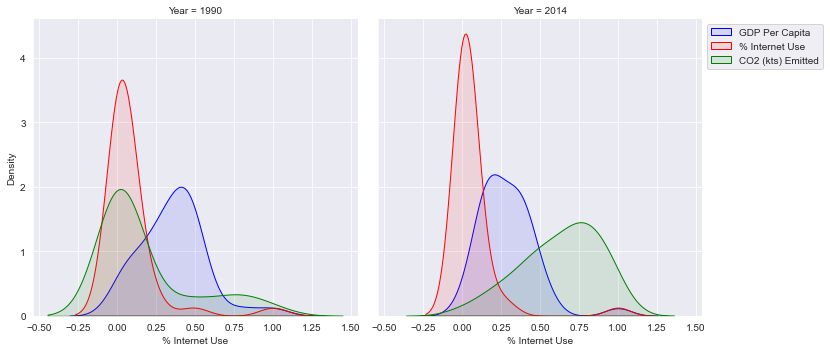

In [57]:
graph = sns.FacetGrid(gaiu_emissions_1990_2014, col = "Year", size = 5)

graph.map(sns.kdeplot, 'GDP Per Capita', shade = True, alpha = 0.1, color = "blue")
graph.map(sns.kdeplot, 'CO2 (kts) Emitted', shade = True, alpha = 0.1, color = "red")
graph.map(sns.kdeplot, '% Internet Use', shade = True, alpha = 0.1, color = "green")
plt.legend(['GDP Per Capita', '% Internet Use', 'CO2 (kts) Emitted'], bbox_to_anchor = [1, 1], loc = 'upper left');

In [58]:
@interact(y = relevant_variables)
def make_scatter(y):
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(x = 'Year', y = y, data = gaiu_emissions, hue = 'Country', palette = 'gist_rainbow')
    plt.legend(bbox_to_anchor = (1.05, 1))
    plt.show()

interactive(children=(Dropdown(description='y', options=('GDP Per Capita', '% Internet Use', 'CO2 (kts) Emitte…

In [59]:
sunburst_data = gaiu_emissions.loc[gaiu_emissions['Year'].isin([2014])]
fig = px.sunburst(sunburst_data, 
                  path = ['Continent', 'Country'], 
                  values = 'CO2 (kts) Emitted', 
                  color = 'GDP Per Capita', 
                  color_continuous_scale = 'earth',
                  color_continuous_midpoint = np.median(sunburst_data['GDP Per Capita']))
fig.show()